# English dataset

## Introduction

This corpus contains two different datasets: one comprises 1,123 Italian sentences and the other one made of 1,200 English sentences, each assessed by human evaluators for their complexity. The evaluations were gathered through a crowdsourcing task involving 20 native speakers for each language. Participants were asked to rate the perceived difficulty of a given sentence on a scale ranging from 1 (indicating 'very easy') to 7 (indicating 'very difficult').

The sentences used in the task were sourced from two distinct treebanks that underwent manual review: the newspaper section of the Italian Universal Dependency Treebank (IUDT) for the Italian experiment, and the automatically converted Wall Street Journal section of the Penn Treebank for the English experiment.

**Goal**: the aim of this project is to construct a model that can predict the complexity judgement for each sentence through different techniques of text mining and data visualization.

In this notebook, we will analyze the English dataset.

## 1. **DATA EXPLORATORY ANALYSIS**

In [ ]:
import pandas as pd
import numpy as np
import spacy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots
import plotly.colors
import plotly.graph_objects as go
import sklearn
import nltk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
import re
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from keras.layers import Dense, Embedding, Flatten
from tensorflow.keras import layers
import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
from tensorflow.keras.layers import Embedding, Flatten, Dense
from keras.layers import Dropout



In [ ]:
#importing dataset from github
url_eng = 'https://media.githubusercontent.com/media/nluninja/nlp_datasets/main/italiannlp/data/complexity_ds_en.csv'

ds_eng = pd.read_csv(url_eng)

In [ ]:
#visualize the first 5 rows
ds_eng.head()

,ID,SENTENCE,judgement1,judgement2,judgement3,judgement4,judgement5,judgement6,judgement7,judgement8,...,judgement11,judgement12,judgement13,judgement14,judgement15,judgement16,judgement17,judgement18,judgement19,judgement20
0,951586555,Amcast Industrial Corp. said it plans to repur...,4,2,1,2,2,3,1,3,...,3,3,4,2,4,2,1,4,3,2
1,951587546,GDP is the total value of a nation's output of...,3,1,1,2,1,1,1,1,...,2,1,1,2,2,1,1,1,1,2
2,951587247,"Town & Country Ford in Charlotte, N.C., still ...",1,2,1,1,2,3,4,2,...,2,4,3,2,1,2,1,2,1,2
3,951586819,"A couple in Rockford, Ill., raised $ 12,591 ea...",1,2,3,2,2,3,3,5,...,2,1,4,6,3,3,1,2,2,4
4,951586503,Yesterday the company said it had filed a requ...,3,5,5,3,1,3,5,6,...,2,2,2,5,2,5,2,4,1,4


In [ ]:
#show the length of the dataset
len(ds_eng)

1200

### Data cleaning and preparation

Firstly, we begin getting data ready for analysis.

Clean and well-prepared data sets the stage for more effective and accurate analysis.
In the process of data cleaning, checking for duplicates, blank sentences and handling missing values is a critical step to ensure data quality.

#### Check for duplicate sentences

We proceede veryfing the presence of duplicate sentences.

In [ ]:
duplicates = ds_eng[ds_eng.duplicated(subset=['SENTENCE'], keep=False)]
duplicates.sort_values(by = ['SENTENCE'])

,ID,SENTENCE,judgement1,judgement2,judgement3,judgement4,judgement5,judgement6,judgement7,judgement8,...,judgement11,judgement12,judgement13,judgement14,judgement15,judgement16,judgement17,judgement18,judgement19,judgement20
1060,951587119,CALL MONEY: 9 3/4 % to 10 %.,5,5,6,6,2,1,1,3,...,6,1,4,3,5,7,4,6,7,1
1055,951587036,CALL MONEY: 9 3/4 % to 10 %.,7,2,1,1,4,7,1,4,...,2,7,1,1,3,3,4,1,4,2
720,951587037,CALL MONEY: 9 3/4 % to 10 %.,7,1,1,2,2,2,4,1,...,2,7,1,1,1,3,5,5,3,1
663,951587035,CALL MONEY: 9 3/4 % to 10 %.,4,1,4,1,4,1,6,2,...,4,4,5,5,3,2,7,4,3,4
22,951587067,Source: Fulton Prebon (U.S.A.) Inc.,3,1,1,1,1,2,3,5,...,1,1,3,6,4,1,2,2,1,5
987,951587070,Source: Fulton Prebon (U.S.A.) Inc.,4,1,1,1,2,4,4,1,...,1,6,1,1,3,1,1,1,1,1
858,951587063,Source: Fulton Prebon (U.S.A.) Inc.,5,2,1,1,1,2,1,2,...,1,1,2,2,3,1,3,1,3,2
1070,951587069,Source: Fulton Prebon (U.S.A.) Inc.,4,1,1,1,1,1,3,1,...,1,1,1,2,1,6,3,1,1,5
697,951587066,Source: Fulton Prebon (U.S.A.) Inc.,3,1,1,1,2,3,4,1,...,1,6,2,2,1,3,1,1,1,2
614,951587145,Source: Fulton Prebon (U.S.A.) Inc.,3,2,1,1,1,1,1,1,...,1,2,6,1,1,1,1,2,1,2


In [ ]:
#indicating how many times each sentence appears in the dataset
duplicate_counts = duplicates['SENTENCE'].value_counts()
duplicate_counts

Source: Fulton Prebon (U.S.A.) Inc.                                                        10
CALL MONEY: 9 3/4 % to 10 %.                                                                4
The record price for a full membership on the exchange is $ 550,000, set Aug. 31, 1987.     2
UAL declined to comment on British Air's statement.                                         2
Name: SENTENCE, dtype: int64

We see that there are four sentences which appear more than one time.
Since levels of judgement are different, we can't simply delete them, but we have to calcolate the mean value of each judgement for each duplicated sentence, in order to preserve information.

In [ ]:
df_eng_dupl = duplicates.groupby('SENTENCE').agg({col: 'mean' for col in duplicates.columns if col.startswith('judgement')}).reset_index()
df_eng_dupl

,SENTENCE,judgement1,judgement2,judgement3,judgement4,judgement5,judgement6,judgement7,judgement8,judgement9,...,judgement11,judgement12,judgement13,judgement14,judgement15,judgement16,judgement17,judgement18,judgement19,judgement20
0,CALL MONEY: 9 3/4 % to 10 %.,5.75,2.25,3.0,2.5,3.0,2.75,3.0,2.5,2.75,...,3.5,4.75,2.75,2.5,3.0,3.75,5.0,4.0,4.25,2.0
1,Source: Fulton Prebon (U.S.A.) Inc.,3.40,1.70,1.3,1.3,1.8,2.20,2.3,1.6,2.00,...,1.4,3.30,2.30,1.8,2.6,1.90,1.8,1.8,1.20,2.8
2,The record price for a full membership on the ...,3.00,2.50,4.5,1.0,4.0,2.00,2.5,2.5,2.00,...,1.0,3.50,2.50,3.0,4.0,2.50,3.5,2.0,3.00,2.0
3,UAL declined to comment on British Air's state...,1.00,1.00,2.0,1.5,1.0,1.00,1.5,2.0,1.50,...,1.0,3.00,1.50,1.0,1.0,2.00,1.0,3.0,1.00,2.0


In [ ]:
df_eng = ds_eng.drop_duplicates(subset = 'SENTENCE', keep = False)
df_eng = pd.concat([df_eng, df_eng_dupl], ignore_index=True)
len(df_eng)

1186

The new dataset **df_eng** has length 1186 since 14 duplicate sentences have been removed. From this moment on we are going to work on this new dataset.

#### Check for missing values

Now we check for missing values, and we see that there are not.

In [ ]:
df_eng.isnull().sum()

ID             4
SENTENCE       0
judgement1     0
judgement2     0
judgement3     0
judgement4     0
judgement5     0
judgement6     0
judgement7     0
judgement8     0
judgement9     0
judgement10    0
judgement11    0
judgement12    0
judgement13    0
judgement14    0
judgement15    0
judgement16    0
judgement17    0
judgement18    0
judgement19    0
judgement20    0
dtype: int64

#### Check for blank sentences

And we check also for blank sentences as follow:

In [ ]:
blank_rows = []

for idx, sentence in df_eng['SENTENCE'].iteritems():
    if type(sentence) == str and sentence.isspace():
        blank_rows.append(idx)


print(blank_rows)

[]


 Our English dataset doesn't contain any blank sentences.

### Data Visualization

Now we perform exploratory data analysis using data visualization tools to show data variables from statistical distribution to linguistic information.

Given that each sentence in the dataset is associated with 20 complexity evaluations, it becomes necessary to condense this information into a singular value. To achieve this, we calculate both the **mean** and **median** for each row. Ultimately, we opt for the metric that results in a more balanced distribution across the classes.

In [ ]:
#computing the mean and the median
df_eng['mean_complexity'] = df_eng.loc[:, 'judgement1': 'judgement20'].mean(axis=1).round(0).astype(int)
df_eng['median_complexity'] = df_eng.loc[:, 'judgement1': 'judgement20'].median(axis=1).round(0).astype(int)

Before to procede, we check if using the mean or the median is almost the same for our analysis.

In [ ]:
equal_mean_median = df_eng['mean_complexity'] == df_eng['median_complexity']

count_equal = equal_mean_median.sum()

percentage_equal = (count_equal / len(df_eng)) * 100

print(f"Percentage of rows with mean equal to the median: {percentage_equal:.4f}%")


Percentage of rows with mean equal to the median: 73.8617%


#### Frequency distribution using the median

Now, we will calculate and visualize the absolute and relative frequencies of complexity classes **obtained with the median**.

In [ ]:
median_judgment_counts = df_eng['median_complexity'].value_counts().sort_index()

total_sentences = len(df_eng)
median_relative_frequencies = median_judgment_counts / total_sentences

median_judgment_frequency_df = pd.DataFrame({
    'Median Complexity': median_judgment_counts.index,
    'Absolute Frequency': median_judgment_counts.values,
    'Relative Frequency': median_relative_frequencies.values
})

# Sort the DataFrame by 'Median Complexity'
median_judgment_frequency_df = median_judgment_frequency_df.sort_values(by='Median Complexity')

median_judgment_frequency_df = median_judgment_frequency_df.reset_index(drop=True)

print(median_judgment_frequency_df)

   Median Complexity  Absolute Frequency  Relative Frequency
0                  1                 161            0.135750
1                  2                 429            0.361720
2                  3                 338            0.284992
3                  4                 221            0.186341
4                  5                  35            0.029511
5                  6                   2            0.001686


In [ ]:
fig = px.bar(median_judgment_frequency_df, x='Median Complexity', y='Relative Frequency',
             title='Frequencies of Complexity Classes using Median',
             labels={'Median Complexity': 'Complexity', 'Relative Frequency': 'Percentage (%)'}
             )

fig.update_traces(texttemplate='%{y:.2%}', textposition='outside')

color_scale = px.colors.sequential.Turbo[::1]
fig.update_traces(marker=dict(color=mean_judgment_frequency_df['Mean Complexity'], colorscale=color_scale))

fig.update(layout_coloraxis_showscale=False)
fig.show()

The bar plot reveals an imbalance in class distribution when employing the median. Specifically, the extreme classes exhibit significantly fewer observations compared to the central ones.

#### Frequency distribution using the mean

Now we proceed computing again the relative frequencies of judgment classes, this time **obtained with the mean**.

In [ ]:
mean_judgment_counts = df_eng['mean_complexity'].value_counts().sort_index()

total_sentences = len(df_eng)
mean_relative_frequencies = mean_judgment_counts / total_sentences

mean_judgment_frequency_df = pd.DataFrame({
    'Mean Complexity': mean_judgment_counts.index,
    'Absolute Frequency': mean_judgment_counts.values,
    'Relative Frequency': mean_relative_frequencies.values
})

mean_judgment_frequency_df = mean_judgment_frequency_df.sort_values(by='Mean Complexity')

# Reset the index for a clean display
mean_judgment_frequency_df = mean_judgment_frequency_df.reset_index(drop=True)

print(mean_judgment_frequency_df)

   Mean Complexity  Absolute Frequency  Relative Frequency
0                1                  72            0.060708
1                2                 385            0.324621
2                3                 450            0.379427
3                4                 251            0.211636
4                5                  28            0.023609


In [ ]:
fig = px.bar(mean_judgment_frequency_df, x='Mean Complexity', y='Relative Frequency',
             title='Frequencies of Complexity Classes using Mean',
             labels={'Mean Complexity': 'Complexity', 'Relative Frequency': 'Percentage (%)'})

fig.update_traces(texttemplate='%{y:.2%}', textposition='outside')

color_scale = px.colors.sequential.Turbo[::1]
fig.update_traces(marker=dict(color=mean_judgment_frequency_df['Mean Complexity'], colorscale=color_scale))

fig.update(layout_coloraxis_showscale=False)
fig.show()

Again, it's apparent that the extreme classes exhibit fewer observations also in this situation. Nevertheless, after having evaluated both the mean and the median, the overall mean distribution appears to be more balanced. Then, we will proceed using the mean value.


In [ ]:
mean_df = pd.DataFrame({'SENTENCE': df_eng['SENTENCE'], 'Complexity': df_eng['mean_complexity']})
mean_df.head()

,SENTENCE,Complexity
0,Amcast Industrial Corp. said it plans to repur...,3
1,GDP is the total value of a nation's output of...,2
2,"Town & Country Ford in Charlotte, N.C., still ...",2
3,"A couple in Rockford, Ill., raised $ 12,591 ea...",3
4,Yesterday the company said it had filed a requ...,3


#### Complexity vs sentence length

We start the analysis by calculating the length of sentences to explore potential correlations with their corresponding complexity classes. Utilizing violin plots, we aim to visually represent these relationships.

In [ ]:
mean_df['Length'] = df_eng['SENTENCE'].str.len()

mean_df.head()

,SENTENCE,Complexity,Length
0,Amcast Industrial Corp. said it plans to repur...,3,136
1,GDP is the total value of a nation's output of...,2,66
2,"Town & Country Ford in Charlotte, N.C., still ...",2,91
3,"A couple in Rockford, Ill., raised $ 12,591 ea...",3,154
4,Yesterday the company said it had filed a requ...,3,161


In [ ]:
fig_length = px.violin(mean_df, y="Length", x="Complexity", color="Complexity",
                box=True, points="all", title="Complexity vs Length of sentences")

fig.update_layout(
    xaxis_title="Complexity",
    yaxis_title="Sentence Length"
)

fig_length.layout.update(showlegend=False)
fig_length.show()

In [ ]:
corr_length = mean_df['Length'].corr(mean_df['Complexity'])

corr_length

0.7107356342177173

From the graph it is clear that as the length of sentences increases, its complexity increases too.
This is confirmed by the strong correlation (0.710) between the two.


#### Complexity vs number of words (tokens)





Next, we replicate the previous procedure, this time focusing on the number of tokens in each sentence. We employ spaCy to calculate the tokens, and the resulting counts are stored in a new column labeled `Tokens` within the `mean_df` dataframe.

In [ ]:
nlp = spacy.load('en_core_web_sm')

total_token_counts = []

# Iterate through the sentences in the DataFrame
for sentence in mean_df['SENTENCE']:
    # Process the sentence with spaCy
    doc = nlp(sentence)

    count = len(doc)

    total_token_counts.append(count)

# Add a new column to the DataFrame with the total token counts
mean_df['Tokens'] = total_token_counts

In [ ]:
mean_df.head()

,SENTENCE,Complexity,Length,Tokens
0,Amcast Industrial Corp. said it plans to repur...,3,136,25
1,GDP is the total value of a nation's output of...,2,66,15
2,"Town & Country Ford in Charlotte, N.C., still ...",2,91,20
3,"A couple in Rockford, Ill., raised $ 12,591 ea...",3,154,30
4,Yesterday the company said it had filed a requ...,3,161,25


In [ ]:
fig_token = px.violin(mean_df, y="Tokens", x="Complexity", color="Complexity",
                box=True, points="all", title="Complexity vs Number of Tokens")
fig_token.layout.update(showlegend=False)
fig_token.show()

In [ ]:
corr_tokens = mean_df['Tokens'].corr(mean_df['Complexity'])
corr_tokens

0.7320105547411025

As before, we can conlude that as the number of tokens increases the complexity of sentences increases too, with a correlation of 0.73.

In [ ]:
min_value_t = min(mean_df['Tokens'])
max_value_t = max(mean_df['Tokens'])

count, bin_edges = np.histogram(mean_df['Tokens'], bins=(max_value_t - min_value_t))

graph = px.bar(x=np.arange(min_value_t, max_value_t), y=count,
                      labels={'x': 'Number of Tokens', 'y': 'Frequencies'},
                      title='Frequency of Tokens in a Sentence <br><sup>(Sentence with StopWords)</sup>',
                      color_discrete_sequence=['lightseagreen'])

graph.update_layout(showlegend=False)
graph.show()

The sentences in the dataframe vary in token count, spanning from 8 to 41. Interestingly, a particular pattern emerges, with the majority of sentences having a token count that is a multiple of 5 (10, 15, 20, ...).

#### Complexity vs number of words without stopwords

This time we compute again the number of tokens in each sentence, but excluding stopwords.

Stop words serves the purpose of focusing on the more meaningful and content-carrying words in our text. Stop words are commonly used words in a language (such as "the," "and," "is") that are often necessary for the grammatical structure of a sentence but do not contribute much to the overall meaning.

In [ ]:
tokens_without_stop_counts = []

for sentence in mean_df['SENTENCE']:

    doc = nlp(sentence)

    # Filter out stop words and count the remaining tokens
    tokens_without_stop = [token.text for token in doc if not token.is_stop]
    count = len(tokens_without_stop)


    tokens_without_stop_counts.append(count)

# Add a new column to the DataFrame with the counts of tokens without stop words
mean_df['Tokens w/out stopwords'] = tokens_without_stop_counts

In [ ]:
mean_df

,SENTENCE,Complexity,Length,Tokens,Tokens w/out stopwords
0,Amcast Industrial Corp. said it plans to repur...,3,136,25,18
1,GDP is the total value of a nation's output of...,2,66,15,8
2,"Town & Country Ford in Charlotte, N.C., still ...",2,91,20,14
3,"A couple in Rockford, Ill., raised $ 12,591 ea...",3,154,30,18
4,Yesterday the company said it had filed a requ...,3,161,25,14
...,...,...,...,...,...
1181,"Also as usual, the products will appeal mostly...",2,99,20,11
1182,CALL MONEY: 9 3/4 % to 10 %.,3,28,10,8
1183,Source: Fulton Prebon (U.S.A.) Inc.,2,35,8,8
1184,The record price for a full membership on the ...,3,87,20,13


In [ ]:
fig_token2 = px.violin(mean_df, y="Tokens w/out stopwords", x="Complexity", color="Complexity",
                box=True, points="all", title="Complexity vs Tokens without stopwrods")
fig_token2.layout.update(showlegend=False)
fig_token2.show()

In [ ]:
corr_tokens_sw = mean_df['Tokens w/out stopwords'].corr(mean_df['Complexity'])
corr_tokens_sw

0.7713203695996741

The pattern is still the same: as the number of tokens (even without stopwords) increases, the complexity of the sentence increases too. Actually we see that correlation is even higher than before, highlighting the fact that stopwords do not add complexity to sentences.

In [ ]:
min_value_sw = min(mean_df['Tokens w/out stopwords'])
max_value_sw = max(mean_df['Tokens w/out stopwords'])

count_sw, bin_edges_sw = np.histogram(mean_df['Tokens w/out stopwords'], bins=(max_value_sw - min_value_sw))

graph_sw = px.bar(x=np.arange(min_value_sw, max_value_sw), y=count_sw,
                      labels={'x': 'Number of Tokens', 'y': 'Frequencies'},
                      title='Frequency of Tokens in a Sentence <br><sup>(Sentence without StopWords)</sup>',
                      color_discrete_sequence=['lightseagreen'])

graph_sw.update_layout(showlegend=False)
graph_sw.show()

Removing stopwords, the minimum number of tokens in a sentence becomes 3, and the maximum is 31. The main distribution of tokens is between 5 and 25.

#### Wordclouds

Next, we can use the **wordcloud** tool to visually depict the word frequency within our text corpus, highlighting the most common or significant words.

To consider all words comprehensively, disregarding distinctions due to upper cases, plurals, and verb tenses, we will employ the **lemmatization** technique. This method reduces all words to their base form, known as the lemma, eliminating variations.

Moreover, we'll exclude stopwords and all special characters, as they don't contribute to enhancing the semantic meaning of a sentence.

In [ ]:
def lemmatize_sentence(sentence):
    doc = nlp(sentence)
    lemmatized_tokens = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_tokens)

mean_df['LEMMA_SENTENCE'] = mean_df['SENTENCE'].apply(lemmatize_sentence)

In [ ]:
def clean_data(sentence):
    doc = nlp(sentence)
    tokens_without_stop_words = [token.text.lower() for token in doc if not token.is_stop]

    cleaned_sentence = re.sub(r'[^a-zA-Z0-9\s%]', '', ' '.join(tokens_without_stop_words))

    cleaned_sentence = cleaned_sentence.replace('%', '')

    return cleaned_sentence

mean_df['LEMMA_SENTENCE'] = mean_df['LEMMA_SENTENCE'].apply(clean_data)

mean_df

,SENTENCE,Complexity,Length,Tokens,Tokens w/out stopwords,LEMMA_SENTENCE
0,Amcast Industrial Corp. said it plans to repur...,3,136,25,18,amcast industrial corp plan repurchase 500000 ...
1,GDP is the total value of a nation's output of...,2,66,15,8,gdp total value nation output good service
2,"Town & Country Ford in Charlotte, N.C., still ...",2,91,20,14,town country ford charlotte nc need 850 198...
3,"A couple in Rockford, Ill., raised $ 12,591 ea...",3,154,30,18,couple rockford ill raise 12591 early year ...
4,Yesterday the company said it had filed a requ...,3,161,25,14,yesterday company file request securities exch...
...,...,...,...,...,...,...
1181,"Also as usual, the products will appeal mostly...",2,99,20,11,usual product appeal heavy user ibm equipment...
1182,CALL MONEY: 9 3/4 % to 10 %.,3,28,10,8,money 9 34 10
1183,Source: Fulton Prebon (U.S.A.) Inc.,2,35,8,8,source fulton prebon usa inc
1184,The record price for a full membership on the ...,3,87,20,13,record price membership exchange 550000 set ...


In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

text = ' '.join(mean_df['LEMMA_SENTENCE'])

wc = WordCloud(
    background_color='white',
    colormap = 'plasma',
    stopwords=stopwords

)

# generate the word cloud
wc.generate(text)

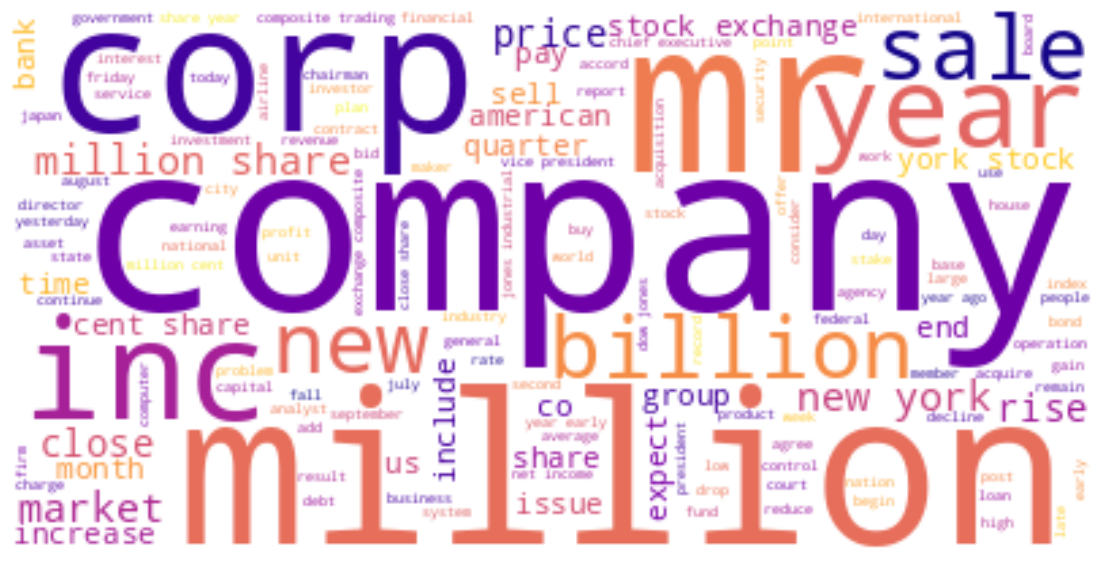

In [ ]:
fig_lemma = plt.figure(figsize=(14, 18))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

It is possible to state from the graphs that the dataset is mainly composed by sentences in the financial field.

#### LDA

In the provided code we implement the LDA algorithm:  this technique is used in the topic modelling context in order to discover latent topics. The goal of LDA is to uncover hidden thematic structures that may be present in a set of texts.

In [ ]:
from gensim.models import LdaModel
from gensim import corpora

# Define a function to extract nouns and verbs from text
def extract_nouns_verbs(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.pos_ in ('NOUN', 'VERB')]
    return tokens


tokenized_text_advanced = [extract_nouns_verbs(sentence) for sentence in mean_df['LEMMA_SENTENCE']]

# Create a dictionary based on the tokenized text
dictionary_advanced = corpora.Dictionary(tokenized_text_advanced)

# Create a corpus for the LDA model
corpus_advanced = [dictionary_advanced.doc2bow(text) for text in tokenized_text_advanced]
# Build an LDA model with advanced parameters
lda_model_advanced = LdaModel(corpus_advanced, num_topics=2, id2word=dictionary_advanced, passes=15)

# Display the top words for each topic in the LDA model
topics_advanced = lda_model_advanced.show_topics(num_topics=2, num_words=10, formatted=False)
for topic in topics_advanced:
    print(f"Topic {topic[0]}: {[word[0] for word in topic[1]]}")


Topic 0: ['share', 'year', 'cent', 'rise', 'quarter', 'trading', 'index', 'market', 'company', 'month']
Topic 1: ['company', 'price', 'sale', 'sell', 'stock', 'offer', 'hold', 'analyst', 'industry', 'result']


From the output above, we can notice that our text corpus is not really a mixture of multiple latent topics, indeed the same words tend to apper in both the topics, and, as we already said before, the main theme is finance.

## 2. NEURAL NETWORK APPROACH

### Oversampling technique

Before delving into machine learning and neural networks, addressing the issue of imbalanced classes is crucial. We experimented with various methods, and the one that proved most effective in handling the situation is a technique of over-sample, duplicating sentences within the minority classes (specifically classes 1 and 5).

After some trials, we decided to introduce 70 duplicated sentences.

In [ ]:
data_dupl = mean_df.copy()
data_dupl = data_dupl[['SENTENCE', 'Complexity']]

minority_class1 = data_dupl[data_dupl['Complexity'] == 1]
minority_class5 = data_dupl[data_dupl['Complexity'] == 5]

duplicate = 70

duplicated_minority1 = minority_class1.sample(duplicate, replace=True)
duplicated_minority5 = minority_class5.sample(duplicate, replace=True)


data_dupl = pd.concat([data_dupl, duplicated_minority1, duplicated_minority5], ignore_index=True)

In [ ]:
len(data_dupl)

1326

In [ ]:
complexity_counts = data_dupl['Complexity'].value_counts().sort_index()

total_sentences = len(data_dupl)
complexity_relative_frequencies = complexity_counts / total_sentences

complexity_frequency_df = pd.DataFrame({
    'Complexity': complexity_counts.index,
    'Absolute Frequency': complexity_counts.values,
    'Relative Frequency': complexity_relative_frequencies.values
})

complexity_frequency_df = complexity_frequency_df.sort_values(by='Complexity')
complexity_frequency_df = complexity_frequency_df.reset_index(drop=True)

In [ ]:
fig = px.bar(complexity_frequency_df, x='Complexity', y='Relative Frequency',
             title='Frequencies of Complexity Classes after duplication',
             labels={'Complexity': 'Complexity', 'Relative Frequency': 'Percentage (%)'})

fig.update_traces(texttemplate='%{y:.2%}', textposition='outside')

color_scale = px.colors.sequential.Turbo[::1]
fig.update_traces(marker=dict(color=complexity_frequency_df['Complexity'], colorscale=color_scale))

fig.update(layout_coloraxis_showscale=False)
fig.show()

We observe that the dataset still remains imbalanced, however showing an improvement from the initial state.

Nevertheless, it's crucial to exercise caution when introducing duplicates, as an excessive amount may result in significant issues like overfitting.

### Machine Learning

To prepare the data for machine learning, we use the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique, which converts text into a numerical representation.

The significance of TF-IDF lies in its ability to maintain the importance of words relative to the entire document set, even for words that occur infrequently. Indeed, when evaluating the complexity of a sentence, the significance of rare words outweighs that of common words.

In [ ]:
data = data_dupl.copy()
data['SENTENCE'] = data['SENTENCE'].apply(lambda x: x.lower())

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(data['SENTENCE'])
y = data['Complexity']

# Split in training e test set
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, random_state=21)

Now we run some models of Machine Learning.



#### Random Forest

In [ ]:
model_RF = RandomForestClassifier(n_estimators=100, random_state=42)

model_RF.fit(X_train, y_train)

predictions_RF = model_RF.predict(X_test)

df_metrics = pd.DataFrame(metrics.confusion_matrix(y_test,predictions_RF), index=['1', '2', '3', '4', '5'], columns=['1', '2', '3', '4', '5'])
df_metrics

,1,2,3,4,5
1,16,14,0,0,0
2,0,80,23,0,0
3,0,34,77,0,1
4,0,10,45,10,0
5,0,0,2,0,20


In [ ]:
print(metrics.classification_report(y_test,predictions_RF))

              precision    recall  f1-score   support

           1       1.00      0.53      0.70        30
           2       0.58      0.78      0.66       103
           3       0.52      0.69      0.59       112
           4       1.00      0.15      0.27        65
           5       0.95      0.91      0.93        22

    accuracy                           0.61       332
   macro avg       0.81      0.61      0.63       332
weighted avg       0.71      0.61      0.58       332



Given our imbalanced dataset, we use the F1-score to evaluate the model. The F1-score, which combines precision and recall, is generally quite high for all classes, except the fourth one.

Precision measures how many predicted positives are actually positive, while recall measures how many actual positives were predicted correctly. The F1-score provides a balanced assessment considering both aspects.

These results are consistent with the confusion matrix plotted above: the model has problems in classyfing class 4, which is mainly confused with class 3.

#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

predictions_nb = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions_nb))

[[  2  10  18   0   0]
 [  0  13  89   1   0]
 [  0  10 102   0   0]
 [  0   1  62   2   0]
 [  0   0  14   4   4]]


In [ ]:
print(metrics.classification_report(y_test,predictions_nb))

              precision    recall  f1-score   support

           1       1.00      0.07      0.12        30
           2       0.38      0.13      0.19       103
           3       0.36      0.91      0.51       112
           4       0.29      0.03      0.06        65
           5       1.00      0.18      0.31        22

    accuracy                           0.37       332
   macro avg       0.61      0.26      0.24       332
weighted avg       0.45      0.37      0.27       332



The Naive Bayes classifier tends to heavily concentrate the sentences in class 3, misclassifying all the others.

#### SVC model

In [ ]:
from sklearn.svm import SVC

svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train)

predictions_svc = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions_svc))

[[  0   0  30   0   0]
 [  0   0 103   0   0]
 [  0   0 112   0   0]
 [  0   0  65   0   0]
 [  0   0  22   0   0]]


In [ ]:
print(metrics.classification_report(y_test,predictions_svc))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00       103
           3       0.34      1.00      0.50       112
           4       0.00      0.00      0.00        65
           5       0.00      0.00      0.00        22

    accuracy                           0.34       332
   macro avg       0.07      0.20      0.10       332
weighted avg       0.11      0.34      0.17       332



The Support Vector Classifier (SVC) model performs even worse than Naive Bayes, placing all the sentences in the class with the highest number of observations.

#### Random Forest removing stopwords

By default, `TfidfVectorizer()` does not filter stopwords. We then attempt to remove them to assess whether this action enhances or diminishes our score.

In [ ]:
tfidf_sw = TfidfVectorizer(stop_words='english')
X_tfidf_sw = tfidf_sw.fit_transform(data['SENTENCE'])
y_sw = data['Complexity']

X_train_sw, X_test_sw, y_train_sw, y_test_sw = train_test_split(X_tfidf_sw, y_sw, test_size=0.2, random_state=21)

In [ ]:
model_RF_sw = RandomForestClassifier(n_estimators=100, random_state=42)

model_RF_sw.fit(X_train_sw, y_train_sw)

predictions_RF_sw = model_RF_sw.predict(X_test_sw)

print(metrics.confusion_matrix(y_test_sw,predictions_RF_sw))

[[13 12  0  0  0]
 [ 0 69 17  0  0]
 [ 1 43 39  3  1]
 [ 0 18 25  7  0]
 [ 0  0  0  0 18]]


In [ ]:
print(metrics.classification_report(y_test_sw,predictions_RF_sw))

              precision    recall  f1-score   support

           1       0.93      0.52      0.67        25
           2       0.49      0.80      0.61        86
           3       0.48      0.45      0.46        87
           4       0.70      0.14      0.23        50
           5       0.95      1.00      0.97        18

    accuracy                           0.55       266
   macro avg       0.71      0.58      0.59       266
weighted avg       0.60      0.55      0.52       266



#### Best model - Random Forest with stopwords

Then, the best model ends up to be the Random Forest considering also the stopwords. This may be explained by the fact that the Random Forest is very robust and works well with imbalanced datasets, as it is our case.
Moreover, keeping the stopwords helps the model to better predict the classes.

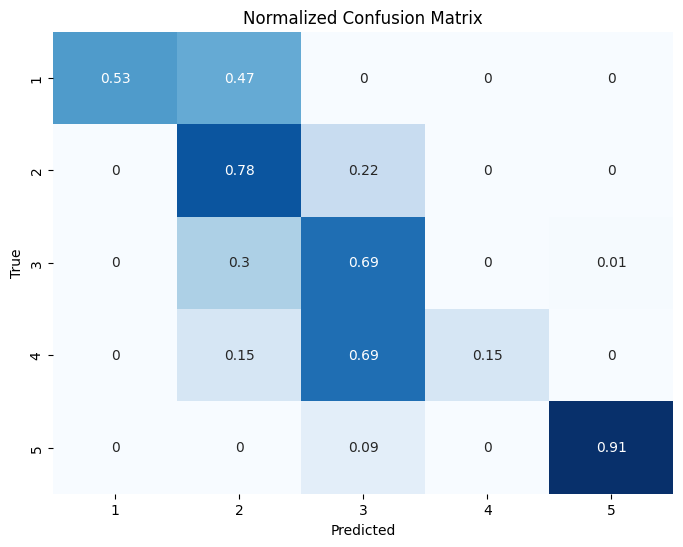

In [ ]:
conf_matrix = metrics.confusion_matrix(y_test, predictions_RF)
class_labels = ['1', '2', '3', '4', '5']

conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

df_cm = pd.DataFrame(np.round(conf_matrix_norm, decimals=2), index=class_labels, columns=class_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

We see that the model predicts quite well all the classes, except for the fourth one, where it tends to confuse values with class 3.
This confirms what the f1-score metric says.


### Neural Network models

We can now move on implementing some neural network models. We will implement a traditional **feed forward** network and then two Recurrent Neural Networks (RNN): the **LSTM** and the **Bi-LSTM**.
We expect to have the two RNN models predict better the sentences, indeed what makes them different from traditional neural networks is that the output from the previous step is fed as input to the current step, then considering also the context and not only the single word by itself. We think that in this analysis considering the context and how the words are related one another may influence the results.

In [ ]:
!python -m spacy download en_core_web_lg

2023-11-26 15:44:31.309628: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 15:44:31.309687: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 15:44:31.309738: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-26 15:44:33.514107: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 743.3 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
nlp = spacy.load('en_core_web_lg')

In [ ]:
data = data_dupl.copy()
data = data[['SENTENCE','Complexity']]
data['SENTENCE'] = data['SENTENCE'].apply(lambda x: x.lower())
data['SENTENCE'] = data['SENTENCE'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

#### Loading a pre-trained word embedding: GloVe

In the code below, we connect to Google Drive to access data and set the path to the GloVe file. This file is expected to contain pre-trained word embeddings in the GloVe format.

Then, the GloVe embeddings are loaded, and a Keras Tokenizer is used to tokenize the text data.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
glove_path = '/content/drive/MyDrive/Colab Notebooks/glove.6B.100d.txt.word2vec'

At this point we create a dictionary, separating words and their associated vectors.

In [ ]:
embeddings_index = {}
f = open(os.path.join('/content/drive/MyDrive/Colab Notebooks/glove.6B.100d.txt.word2vec'))
for line in f:
  values = line.split()
  word = values[0] # extract the first part of each row (the words)
  coefs = np.asarray(values[1:], dtype='float32') # extract the embedding vector and converts it to a NumPy array
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors. ' % len(embeddings_index))

Found 400001 word vectors. 


The vocabulary comprises 400,000 words represented by a feature vector of dimension 100.

In [ ]:
max_features = 10000
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['SENTENCE'].values)
vocab_size = len(tokenizer.word_index) + 1
X = tokenizer.texts_to_sequences(data['SENTENCE'].values)

In [ ]:
X = pad_sequences(X)

In [ ]:
Y = pd.get_dummies(data['Complexity']).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 21)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(928, 34) (928, 5)
(398, 34) (398, 5)


In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens.'%len(word_index))

Found 4898 unique tokens.


In [ ]:
max_features = 10000
num_words = min(max_features, len(word_index)) + 1
print(num_words)

embedding_matrix = np.zeros((num_words, 100))

for word, i in word_index.items():
    if i > max_features: # skip words with indices greater than max features
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

4899


We create an embedding matrix based on **GloVe**. In the matrix, each row represents a word in the vocabulary, and the values are **GloVe embeddings**. It iterates through the vocabulary, checks if the word is within the specified maximum features, and if so, assigns the GloVe embedding to the corresponding row in the matrix. This matrix is then used as input for the following **Neural Network Models**.

#### Feed Forward

We start with a Feed Forward Neural Network using **GloVe embeddings**. The activation function is **Relu** and, since we are talking of a multi-class problem, the chosen activation function is **softmax**, with categorical cross-entropy loss.

We set `trainable=False` for the embedding layer with pre-trained word embeddings in order to leverage existing knowledge encoded in those embeddings, thus trying to prevent overfitting.

In [ ]:
# Set the parameters
embed_dim = 100
max_features = 10000

model_ff_glove = Sequential()

# Add the embedding layer with GloVe weights
model_ff_glove.add(Embedding(input_dim=num_words, output_dim=embed_dim, weights=[embedding_matrix], trainable=False, input_length=X.shape[1]))
model_ff_glove.add(Flatten())
model_ff_glove.add(Dense(128, activation='relu'))
model_ff_glove.ad'd(Dense(5, activation='softmax'))

# Compile the model
model_ff_glove.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_ff_glove.summary())


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 34, 100)           489900    
                                                                 
 flatten_2 (Flatten)         (None, 3400)              0         
                                                                 
 dense_11 (Dense)            (None, 128)               435328    
                                                                 
 dense_12 (Dense)            (None, 5)                 645       
                                                                 
Total params: 925873 (3.53 MB)
Trainable params: 435973 (1.66 MB)
Non-trainable params: 489900 (1.87 MB)
_________________________________________________________________
None


In [ ]:
batch_size = 8
model_ff_glove.fit(X_train, Y_train, epochs=10, batch_size=batch_size, verbose=2)

# Evaluate the model
score = model_ff_glove.evaluate(X_test, Y_test, verbose=0)
print(f'Test loss: {score[0]}, Test accuracy: {score[1]}')

Epoch 1/10
116/116 - 1s - loss: 0.9659 - accuracy: 0.5938 - 1s/epoch - 9ms/step
Epoch 2/10
116/116 - 0s - loss: 0.3678 - accuracy: 0.8696 - 276ms/epoch - 2ms/step
Epoch 3/10
116/116 - 0s - loss: 0.1592 - accuracy: 0.9677 - 273ms/epoch - 2ms/step
Epoch 4/10
116/116 - 0s - loss: 0.0931 - accuracy: 0.9784 - 263ms/epoch - 2ms/step
Epoch 5/10
116/116 - 0s - loss: 0.0654 - accuracy: 0.9860 - 292ms/epoch - 3ms/step
Epoch 6/10
116/116 - 0s - loss: 0.0618 - accuracy: 0.9817 - 260ms/epoch - 2ms/step
Epoch 7/10
116/116 - 0s - loss: 0.0555 - accuracy: 0.9838 - 274ms/epoch - 2ms/step
Epoch 8/10
116/116 - 0s - loss: 0.0468 - accuracy: 0.9881 - 293ms/epoch - 3ms/step
Epoch 9/10
116/116 - 0s - loss: 0.0466 - accuracy: 0.9828 - 258ms/epoch - 2ms/step
Epoch 10/10
116/116 - 0s - loss: 0.0316 - accuracy: 0.9925 - 277ms/epoch - 2ms/step
Test loss: 1.414421796798706, Test accuracy: 0.6633166074752808


In [ ]:
predictions_ff = model_ff_glove.predict(X_test)

13/13 [==============================] - 0s 2ms/step


In [ ]:
score_ff, acc_ff = model_ff_glove.evaluate(X_test, Y_test, verbose=2, batch_size=batch_size)
print("Accuracy: %.2f" % (acc_ff))

50/50 - 0s - loss: 1.4144 - accuracy: 0.6633 - 122ms/epoch - 2ms/step
Accuracy: 0.66


Given the imbalanced nature of our dataset, relying solely on accuracy may not provide a comprehensive evaluation of the model's performance. Therefore, we define a function to compute a range of metrics, allowing for a better assessment of the model's effectiveness.

In [ ]:
def from_encode_to_literal_labels(y_true, y_pred):
    # Transform sequences of encoded labels in sequences of string labels
    let_y_true = list()
    let_y_pred = list()
    for sent_idx in range(len(y_true)):
        let_y_true.append(str(y_true[sent_idx] + 1))
        let_y_pred.append(str(y_pred[sent_idx] + 1))

    return let_y_true, let_y_pred

In [ ]:
datasets = [('Training Set', X_train, Y_train), ('Test Set', X_test, Y_test)]

for title, X, Y in datasets:
    Y_pred = model_ff_glove.predict(X, batch_size = batch_size)
    Y_pred = np.array(np.argmax(Y_pred, axis = -1))
    Y = np.array(np.argmax(Y, axis=-1))
    let_y_true, let_y_pred = from_encode_to_literal_labels(Y, Y_pred)


    print(title)
    print(metrics.classification_report(let_y_true, let_y_pred))
    print('\n')


116/116 [==============================] - 0s 2ms/step
Training Set
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       103
           2       0.98      1.00      0.99       265
           3       1.00      0.97      0.99       317
           4       1.00      1.00      1.00       174
           5       0.96      1.00      0.98        69

    accuracy                           0.99       928
   macro avg       0.99      0.99      0.99       928
weighted avg       0.99      0.99      0.99       928



50/50 [==============================] - 0s 2ms/step
Test Set
              precision    recall  f1-score   support

           1       0.76      0.67      0.71        39
           2       0.65      0.78      0.71       120
           3       0.58      0.68      0.63       133
           4       0.78      0.36      0.50        77
           5       0.84      0.93      0.89        29

    accuracy                           0.66       398

Being the Feed Forward method a simple Neural Network, it is really affected by overfitting problems, then we try to perform more structured Networks.

####LSTM

Now we construct a LSTM Model using again pre-trained GloVe word embeddings to initialize the embedding layer. The model incorporates an **LSTM layer** for sequence processing, with a dropout of 0.5 and a **Dense layer** for classification, with softmax activation function and categorical crossentropy loss.


In [ ]:
embed_dim = 100
lstm_out = 250

max_features = 10000

model_lstm = Sequential()
model_lstm.add(Embedding(num_words, embed_dim, weights=[embedding_matrix], input_length=X.shape[1], trainable=False))
model_lstm.add(LSTM(lstm_out, dropout = 0.5))
model_lstm.add(Dense(5, activation='softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], run_eagerly=True)
print(model_lstm.summary())


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 34, 100)           489900    
                                                                 
 lstm_24 (LSTM)              (None, 250)               351000    
                                                                 
 dense_22 (Dense)            (None, 5)                 1255      
                                                                 
Total params: 842155 (3.21 MB)
Trainable params: 352255 (1.34 MB)
Non-trainable params: 489900 (1.87 MB)
_________________________________________________________________
None


We can train the model

In [ ]:
# train the model
batch_size = 8
model_lstm.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 2)

Epoch 1/10
116/116 - 5s - loss: 1.2032 - accuracy: 0.4752 - 5s/epoch - 42ms/step
Epoch 2/10
116/116 - 5s - loss: 0.9279 - accuracy: 0.5884 - 5s/epoch - 42ms/step
Epoch 3/10
116/116 - 5s - loss: 0.8230 - accuracy: 0.6293 - 5s/epoch - 46ms/step
Epoch 4/10
116/116 - 4s - loss: 0.7436 - accuracy: 0.6800 - 4s/epoch - 38ms/step
Epoch 5/10
116/116 - 5s - loss: 0.6990 - accuracy: 0.7069 - 5s/epoch - 41ms/step
Epoch 6/10
116/116 - 5s - loss: 0.6806 - accuracy: 0.7112 - 5s/epoch - 46ms/step
Epoch 7/10
116/116 - 5s - loss: 0.6377 - accuracy: 0.7134 - 5s/epoch - 39ms/step
Epoch 8/10
116/116 - 5s - loss: 0.6180 - accuracy: 0.7381 - 5s/epoch - 42ms/step
Epoch 9/10
116/116 - 5s - loss: 0.5663 - accuracy: 0.7651 - 5s/epoch - 46ms/step
Epoch 10/10
116/116 - 4s - loss: 0.5379 - accuracy: 0.7640 - 4s/epoch - 38ms/step


In [ ]:
# predictions
predictions = model_lstm.predict(X_test)

13/13 [==============================] - 0s 13ms/step


In [ ]:
prediction_classes=np.argmax(predictions,axis=1)

In [ ]:
score,acc = model_lstm.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)

print("acc: %.2f" % (acc))

50/50 - 1s - loss: 0.8082 - accuracy: 0.6884 - 820ms/epoch - 16ms/step
acc: 0.69


In [ ]:
datasets = [('Training Set', X_train, Y_train), ('Test Set', X_test, Y_test)]

for title, X, Y in datasets:
    Y_pred = model_lstm.predict(X, batch_size = batch_size)
    Y_pred = np.array(np.argmax(Y_pred, axis = -1))
    Y = np.array(np.argmax(Y, axis=-1))
    let_y_true, let_y_pred = from_encode_to_literal_labels(Y, Y_pred)


    print(title)
    print(metrics.classification_report(let_y_true, let_y_pred))
    print('\n')


116/116 [==============================] - 1s 10ms/step
Training Set
              precision    recall  f1-score   support

           1       0.99      0.90      0.94       103
           2       0.85      0.95      0.90       265
           3       0.80      0.87      0.83       317
           4       0.89      0.65      0.75       174
           5       0.90      0.88      0.89        69

    accuracy                           0.85       928
   macro avg       0.89      0.85      0.86       928
weighted avg       0.86      0.85      0.85       928



50/50 [==============================] - 1s 10ms/step
Test Set
              precision    recall  f1-score   support

           1       0.83      0.74      0.78        39
           2       0.73      0.78      0.76       120
           3       0.61      0.72      0.66       133
           4       0.66      0.43      0.52        77
           5       0.79      0.76      0.77        29

    accuracy                           0.69       3

Again there is some overfitting, expecially in classes 1, 2 and 5, but situation has improved with respect to before.

#### Bi-LSTM

Here we implement a Bidirectional LSTM Model, which extends the LSTM architecture by introducing the ability to process information in both forward and backward directions through the input sequence. Then, the model incorporates an Bi-LSTM layer for sequence processing, with a dropout of 0.5 and a Dense layer for classification.

In [ ]:
max_features = 10000
embed_dim = 100

blstm_glove = Sequential()

# Aggiunta del layer di embedding con i pesi da GloVe
blstm_glove.add(Embedding(num_words, embed_dim, weights=[embedding_matrix], input_length=X.shape[1], trainable=False))
blstm_glove.add(Bidirectional(LSTM(lstm_out, dropout=0.5)))
blstm_glove.add(Dense(units=5, activation='softmax'))

# Compilazione del modello
blstm_glove.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Visualizzazione della struttura del modello
print(blstm_glove.summary())

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 34, 100)           489900    
                                                                 
 bidirectional_20 (Bidirect  (None, 500)               702000    
 ional)                                                          
                                                                 
 dense_21 (Dense)            (None, 5)                 2505      
                                                                 
Total params: 1194405 (4.56 MB)
Trainable params: 704505 (2.69 MB)
Non-trainable params: 489900 (1.87 MB)
_________________________________________________________________
None


In [ ]:
blstm_glove.fit(X_train, Y_train, epochs=5, batch_size=batch_size, verbose=2)
score_blstm, acc_blstm = blstm_glove.evaluate(X_test, Y_test, verbose=2, batch_size=batch_size)
print("Accuracy: %.2f" % acc_blstm)

Epoch 1/5
116/116 - 1s - loss: 0.4326 - accuracy: 0.8211 - 753ms/epoch - 6ms/step
Epoch 2/5
116/116 - 1s - loss: 0.3941 - accuracy: 0.8341 - 692ms/epoch - 6ms/step
Epoch 3/5
116/116 - 1s - loss: 0.3842 - accuracy: 0.8405 - 687ms/epoch - 6ms/step
Epoch 4/5
116/116 - 1s - loss: 0.3435 - accuracy: 0.8588 - 688ms/epoch - 6ms/step
Epoch 5/5
116/116 - 1s - loss: 0.3204 - accuracy: 0.8696 - 691ms/epoch - 6ms/step
50/50 - 0s - loss: 0.8487 - accuracy: 0.6935 - 210ms/epoch - 4ms/step
Accuracy: 0.69


In [ ]:
datasets = [('Training Set', X_train, Y_train), ('Test Set', X_test, Y_test)]

for title, X, Y in datasets:
    Y_pred = blstm_glove.predict(X, batch_size = batch_size)
    Y_pred = np.array(np.argmax(Y_pred, axis = -1))
    Y = np.array(np.argmax(Y, axis=-1))
    let_y_true, let_y_pred = from_encode_to_literal_labels(Y, Y_pred)


    print(title)
    print(metrics.classification_report(let_y_true, let_y_pred))
    print('\n')


116/116 [==============================] - 0s 4ms/step
Training Set
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       103
           2       0.98      0.97      0.97       265
           3       0.96      0.95      0.96       317
           4       0.95      0.97      0.96       174
           5       0.96      1.00      0.98        69

    accuracy                           0.97       928
   macro avg       0.97      0.98      0.97       928
weighted avg       0.97      0.97      0.97       928



50/50 [==============================] - 0s 3ms/step
Test Set
              precision    recall  f1-score   support

           1       0.80      0.82      0.81        39
           2       0.78      0.70      0.74       120
           3       0.61      0.63      0.62       133
           4       0.62      0.61      0.61        77
           5       0.78      1.00      0.88        29

    accuracy                           0.69       398

Again we see a really high problem of overfitting.

#### Bi-LSTM with 2 layers
We try now to perform a Bi-LSTM model with 2 layers and a drop-out of 0.3. Moreover, we reduce the number of epoches to 5.

In [ ]:
max_features = 10000
embed_dim = 100
lstm_units = 100

blstm_glove_of = Sequential()

blstm_glove_of.add(Embedding(num_words, output_dim=embed_dim, weights=[embedding_matrix], input_length=X.shape[1], trainable=False))
blstm_glove_of.add(Bidirectional(LSTM(lstm_out, return_sequences = True,
                                   dropout = 0.3)))
blstm_glove_of.add(Bidirectional(LSTM(lstm_out, return_sequences=False,
                                 dropout = 0.3)))
blstm_glove_of.add(Dense(units=5, activation='softmax'))
blstm_glove_of.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


print(blstm_glove_of.summary())

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 34, 100)           489900    
                                                                 
 bidirectional_18 (Bidirect  (None, 34, 500)           702000    
 ional)                                                          
                                                                 
 bidirectional_19 (Bidirect  (None, 500)               1502000   
 ional)                                                          
                                                                 
 dense_20 (Dense)            (None, 5)                 2505      
                                                                 
Total params: 2696405 (10.29 MB)
Trainable params: 2206505 (8.42 MB)
Non-trainable params: 489900 (1.87 MB)
_________________________________________________________________
None


In [ ]:
blstm_glove_of.fit(X_train, Y_train, epochs=5, batch_size=batch_size, verbose=2)
score_blstm1, acc_blstm1 = blstm_glove_of.evaluate(X_test, Y_test, verbose=2, batch_size=batch_size)
print("Accuracy: %.2f" % acc_blstm1)

Epoch 1/5
116/116 - 10s - loss: 1.0713 - accuracy: 0.5259 - 10s/epoch - 84ms/step
Epoch 2/5
116/116 - 1s - loss: 0.8795 - accuracy: 0.6067 - 1s/epoch - 10ms/step
Epoch 3/5
116/116 - 1s - loss: 0.8216 - accuracy: 0.6433 - 1s/epoch - 10ms/step
Epoch 4/5
116/116 - 1s - loss: 0.7251 - accuracy: 0.6929 - 1s/epoch - 10ms/step
Epoch 5/5
116/116 - 1s - loss: 0.6653 - accuracy: 0.7349 - 1s/epoch - 10ms/step
50/50 - 2s - loss: 0.8283 - accuracy: 0.6382 - 2s/epoch - 31ms/step
Accuracy: 0.64


In [ ]:
datasets = [('Training Set', X_train, Y_train), ('Test Set', X_test, Y_test)]

for title, X, Y in datasets:
    Y_pred = blstm_glove_of.predict(X, batch_size = batch_size)
    Y_pred = np.array(np.argmax(Y_pred, axis = -1))
    Y = np.array(np.argmax(Y, axis=-1))
    let_y_true, let_y_pred = from_encode_to_literal_labels(Y, Y_pred)


    print(title)
    print(metrics.classification_report(let_y_true, let_y_pred))
    print('\n')


116/116 [==============================] - 3s 7ms/step
Training Set
              precision    recall  f1-score   support

           1       0.86      0.94      0.90       103
           2       0.86      0.80      0.83       265
           3       0.79      0.68      0.73       317
           4       0.64      0.90      0.75       174
           5       1.00      0.72      0.84        69

    accuracy                           0.79       928
   macro avg       0.83      0.81      0.81       928
weighted avg       0.81      0.79      0.79       928



50/50 [==============================] - 2s 7ms/step
Test Set
              precision    recall  f1-score   support

           1       0.68      0.69      0.68        39
           2       0.72      0.66      0.69       120
           3       0.62      0.58      0.60       133
           4       0.53      0.71      0.61        77
           5       0.80      0.55      0.65        29

    accuracy                           0.64       398

#### Best Model


The best model ends up to be the Bi-LSTM with 2 layers and drop out of 0.3. Moreover we decide to run only five epoches for reducing problems of overfitting.

We now plot the confusion matrix to better analyze the results.

In [ ]:
Y_pred =blstm_glove_of.predict(X_test)

y_pred_classes = np.argmax(Y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)

# Create the confusion matrix
conf_matrix_blstm_of = confusion_matrix(y_true_classes, y_pred_classes)

13/13 [==============================] - 0s 9ms/step


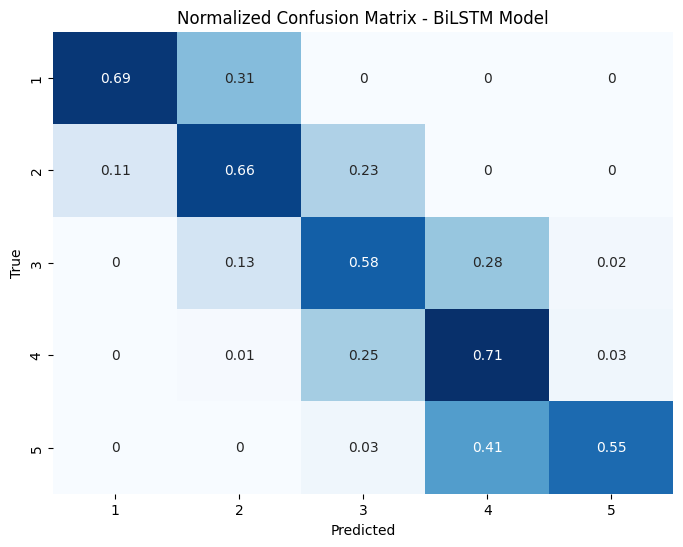

In [ ]:
class_labels = ['1', '2', '3', '4', '5']

cm_norm = conf_matrix_blstm_of.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

cm_bilstm = pd.DataFrame(np.round(cm_norm, decimals=2), index=class_labels, columns=class_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_bilstm, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix - BiLSTM Model')
plt.show()

We observe that the model effectively discriminates between all the classes. However, a notable challenge arises in distinguishing class 5, which is frequently misidentified and tends to be confused with class 4 in nearly half of the cases.

We can make some final considerations:
- **Overfitting** : The model exhibits notable overfitting issues, likely exacerbated by the duplication of sentences we performed before. Introducing dropout and increasing the number of layers to enhance the model's structure has mitigated this problem to some extent.

- **Unbalanced Classes**: The impact of unbalanced classes is particularly noticeable in the fifth class, characterized by a scarcity of observations.

The Bi-LSTM model, with its two-layer structure, performs significantly better than the random forest model in classifying the various classes. Specifically, the recurrent neural network (RNN) effectively addresses the issue of misclassifying instances in class 4, which was present in the machine learning approach.

## 3. TRANSFORMER BASED APPROACH

In [ ]:
import random
import pandas as pd
import numpy as np
import os
!pip install torch
!pip install umap-learn
import torch
from torch.utils.data import DataLoader
from torch.optim import SGD, Adam
from tqdm import tqdm
!pip install seqeval
from seqeval.metrics import classification_report
!pip install transformers[torch]
from transformers import AutoTokenizer
!pip install datasets
import datasets
from datasets import DatasetDict, Dataset
from transformers import AutoModel
from transformers import AutoModelForSequenceClassification
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score
from transformers import Trainer, TrainingArguments
from sklearn.linear_model import LogisticRegression
import logging
import sys
from textwrap import TextWrapper
import huggingface_hub

In [ ]:
dataT = data_dupl.copy()
dataT['SENTENCE'] = dataT['SENTENCE'].apply(lambda x: x.lower())
dataT['Complexity'] = dataT['Complexity'].apply(lambda x: int(str(x))-1)

we decide to apply two Transformer models to compare them and evaluate which one would predict better the 5 classes.

Moreover, at the end we try also to apply the BERT model to the initial dataset (without performing oversampling).

### DistilBERT

We start with DistilBERT, which is a small, fast, cheap and light Transformer model trained by distilling BERT base. It has 40% less parameters than bert-base-uncased, runs 60% faster while preserving over 95% of BERT’s performances as measured on the GLUE language understanding benchmark.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
tokenized_sentence = tokenizer(dataT['SENTENCE'][0], padding='max_length', max_length=34,truncation=True, return_tensors="pt")
print(tokenizer.decode(tokenized_sentence.input_ids[0]))

[CLS] amcast industrial corp. said it plans to repurchase 500, 000 shares, or about 7 % of its shares outstanding, in open market transactions. [SEP] [PAD]


In [ ]:
tokens=tokenizer.convert_ids_to_tokens(tokenized_sentence["input_ids"][0])
print(tokens)

['[CLS]', 'amc', '##ast', 'industrial', 'corp', '.', 'said', 'it', 'plans', 'to', 'rep', '##ur', '##chase', '500', ',', '000', 'shares', ',', 'or', 'about', '7', '%', 'of', 'its', 'shares', 'outstanding', ',', 'in', 'open', 'market', 'transactions', '.', '[SEP]', '[PAD]']


In [ ]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] amcast industrial corp. said it plans to repurchase 500, 000 shares, or about 7 % of its shares outstanding, in open market transactions. [SEP] [PAD]


In [ ]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [ ]:
X,Y=dataT['SENTENCE'], dataT['Complexity']

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.10, random_state = 42)

In [ ]:
train_ds_pandas = pd.concat([pd.Series(X_train),pd.Series(Y_train)],axis=1)
valid_ds_pandas = pd.concat([pd.Series(X_valid),pd.Series(Y_valid)],axis=1)
test_ds_pandas = pd.concat([pd.Series(X_test),pd.Series(Y_test)],axis=1)

In [ ]:
train_ds_pandas.columns = ['text', 'label']
valid_ds_pandas.columns = ['text', 'label']
test_ds_pandas.columns = ['text', 'label']

In [ ]:
trainds = Dataset.from_pandas(train_ds_pandas)
vds = Dataset.from_pandas(valid_ds_pandas)
testds = Dataset.from_pandas(test_ds_pandas)

We create a dictionary deviding data into train, test and validation.

In [ ]:
ds = DatasetDict()

ds['train'] = trainds
ds['validation'] = vds
ds['test'] = testds

print(ds)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 835
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 93
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 398
    })
})


In [ ]:
print(tokenize(ds["train"][:2]))

{'input_ids': [[101, 2892, 3122, 10995, 2924, 1005, 1055, 4518, 22088, 11368, 2098, 2044, 2968, 6749, 1037, 8636, 1997, 11443, 4859, 10504, 2006, 2119, 2049, 2691, 1998, 6871, 4518, 2138, 2892, 3122, 2089, 2025, 3113, 1996, 2047, 2231, 3007, 9181, 4621, 11703, 1012, 1021, 1012, 102], [101, 1998, 6568, 3138, 1999, 1996, 2560, 2769, 1999, 3539, 2051, 1025, 5925, 1998, 6788, 3715, 2382, 1003, 2000, 3486, 1003, 2062, 2005, 14997, 1010, 2429, 2000, 1037, 3528, 5002, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [ ]:
ds_encoded = ds.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/835 [00:00<?, ? examples/s]

Map:   0%|          | 0/93 [00:00<?, ? examples/s]

Map:   0%|          | 0/398 [00:00<?, ? examples/s]

Here we get the encoded sentences as `input_ids`, together with a list of `attention_mask` arrays, which allows the model to ignore the padded parts of the input.

In [ ]:
print(ds_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


To perform the model, we download and use distilbert-base-uncased.
Moreover, we use an auto class `AutoModel`, which has the `from_pretrained()` method that loads the weights of a pretrained model.

In [ ]:
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Now we extract the last hidden states, storing the values in a new column `last_hidden_state`

In [ ]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

Given that our model requires tensors as inputs, the subsequent step involves transforming the `input_ids` and `attention_mask` columns into the "torch" format to ensure compatibility with PyTorch.

In [ ]:
ds_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [ ]:
ds_hidden = ds_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/835 [00:00<?, ? examples/s]

Map:   0%|          | 0/93 [00:00<?, ? examples/s]

Map:   0%|          | 0/398 [00:00<?, ? examples/s]

In [ ]:
ds_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

Now that we have the hidden states associated with each sentence, we can go on trining a classifier on it. In particular, we will use the hidden states as input features and the labels as target.

In [ ]:
X_train = np.array(ds_hidden["train"]["hidden_state"])
X_valid = np.array(ds_hidden["validation"]["hidden_state"])
y_train = np.array(ds_hidden["train"]["label"])
y_valid = np.array(ds_hidden["validation"]["label"])
X_test = np.array(ds_hidden["test"]["hidden_state"])
y_test = np.array(ds_hidden["test"]["label"])

X_train.shape, X_valid.shape, X_test.shape

((835, 768), (93, 768), (398, 768))

To simplify the visualization of the hidden states, which originally have 768 dimensions, the `UMAP` algorithm is used. This reduces the dimensionality of the data to 2 components while considering the cosine distance as the metric, allowing for a better visualization

Since UMAP needs features to be in the interval [0,1], we'll first apply a `MinMaxScaler`.

In [ ]:
import umap.umap_ as umap
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = umap.UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,11.153813,4.512203,3
1,8.555239,5.597887,3
2,9.145281,3.172457,2
3,12.512088,4.709745,4
4,6.132473,7.099334,2


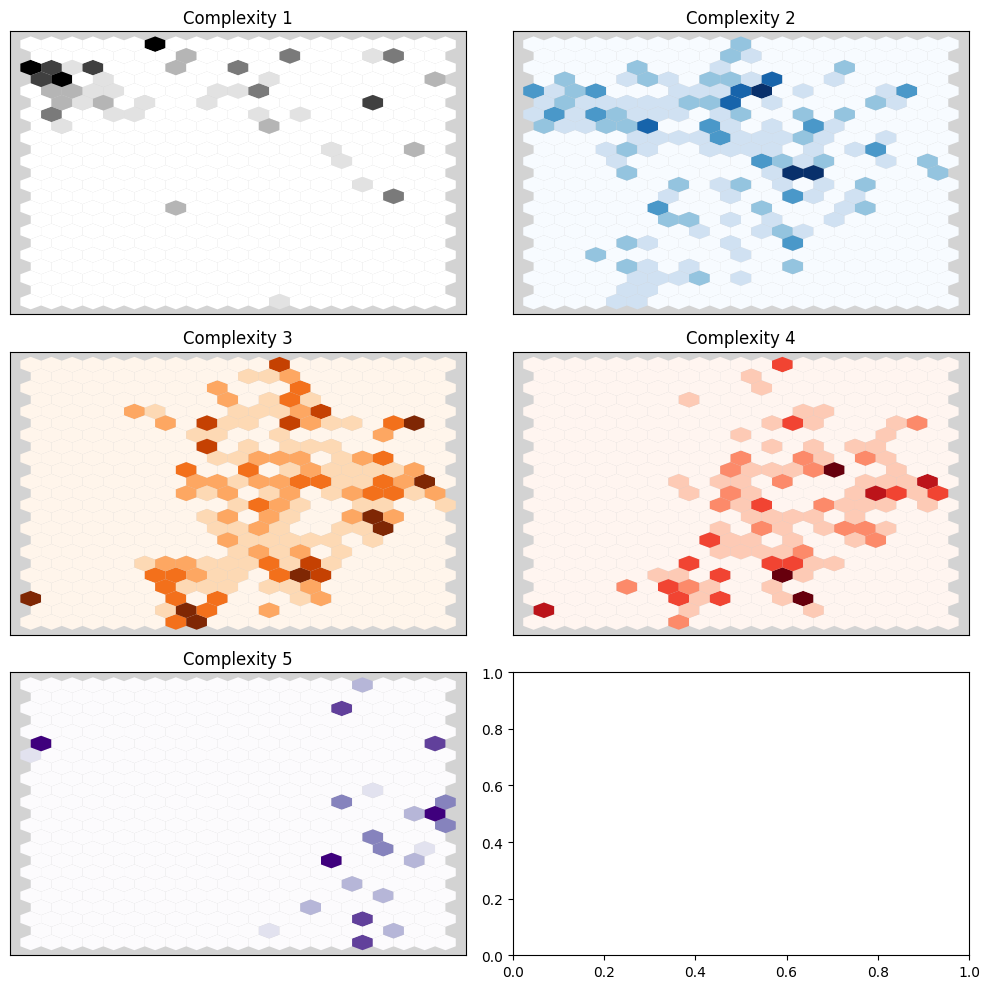

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10,10))
axes = axes.flatten()
cmaps = ["Greys","Blues", "Oranges", "Reds", "Purples"]
labels = ['Complexity 1','Complexity 2','Complexity 3','Complexity 4', 'Complexity 5']

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    hb = axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,), vmin=0, vmax=5)
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])
    axes[i].set_facecolor('lightgray')



plt.tight_layout()
plt.show()

The density plot illustrates the distribution of points for each category, projected into a lower-dimensional space. It's crucial to note that overlapping categories in this projection don't necessarily imply inseparability in the original space. Similarly, if categories are separable in the projected space, they remain separable in the original space.

Observing the graph, we notice significant overlap in the central region, contributing to the model's predictive challenges. This overlap is particularly noticeable in classes 3 and 4, aligning with our previous findings.

We can finally train the model using the hidden states.

We start by running a Logistic Regression model with Scikit-Learn, using pre-trained weights.

In [ ]:
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [ ]:
lr_clf.score(X_valid, y_valid)

0.6559139784946236

In [ ]:
lr_clf.score(X_test, y_test)

0.6055276381909548

We see that the Test set achieves a slightly worse result than the Validation Test. But results still are coherent with the models implemented before.

We can examin better the model by fitting a Dummy Classifier. This is a sort of baseline, since this tries to make predictions without finding patterns in the data.

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.3763440860215054

We achieve an accuracy of about 38%, showing that the simple classifier with DistilBERT embeddings is significantly better than the baseline.

In [ ]:
y_preds = lr_clf.predict(X_test)
y_test = np.array(ds_hidden["test"]["label"])

In [ ]:
def from_encode_to_literal_labels(y_true, y_pred):
    # Transform sequences of encoded labels in sequences of string labels
    let_y_true = list()
    let_y_pred = list()
    for sent_idx in range(len(y_true)):
        let_y_true.append(str(y_true[sent_idx] + 1))
        let_y_pred.append(str(y_pred[sent_idx] + 1))

    return let_y_true, let_y_pred

In [ ]:
let_y_true, let_y_pred = from_encode_to_literal_labels(y_test, y_preds)
print('Test set')
print(metrics.classification_report(let_y_true, let_y_pred))

Test set
              precision    recall  f1-score   support

           1       0.67      0.74      0.70        42
           2       0.74      0.62      0.67       126
           3       0.54      0.58      0.56       129
           4       0.48      0.47      0.48        72
           5       0.62      0.79      0.70        29

    accuracy                           0.61       398
   macro avg       0.61      0.64      0.62       398
weighted avg       0.61      0.61      0.61       398



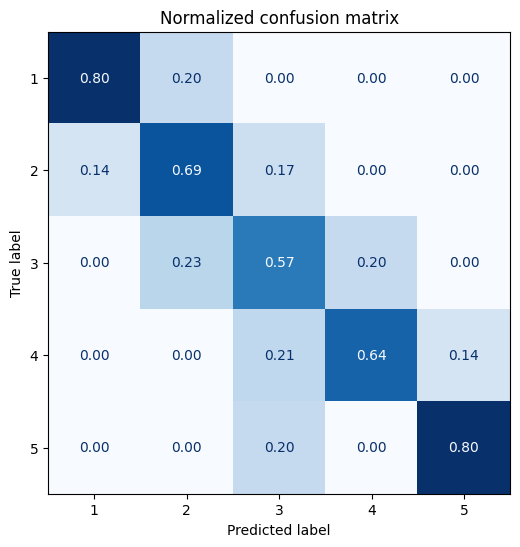

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,2,3,4,5])
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

The pre-trained DistilBERT model exhibits effective class predictions. Notably, each class shows a tendency to be occasionally misclassified with neighboring classes. This is a common occurrence, given that complexity is subjective, and different individuals may assign slightly different judgments to the same sentence.

#### Fine tuning

In this section we will explore the fine-tuning approach, which should lead to higher classification performance.

The fine-tuning implies that the hidden staes are not taken as fixed features, but these are trained.

We firstly load again the pretrained DistilBERT.
This time we will use the `AutoModelForSequenceClassification` as classification head on top of the pretrained model outputs.

In [ ]:
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_labels = 5
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=5)
         .to(device))

In order to evaluate the following models, we define a `compute_metrics` function.

In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

To set the training parameters, we employ the `TrainingArguments` class, which is part of the Hugging Face transformers library and is used to store all the information from the training process. Then it will output all of them in the specified `output_dir`.

In [ ]:
batch_size = 8
logging_steps = len(ds_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-judgements"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=10,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False, #tqdm to see the progress bar
                                  logging_steps=logging_steps,
                                  push_to_hub=False,  # do not push on the hugging face hub
                                  log_level="error")

Then we use the Trainer to finally tune the model with all the parameters specified before.

In [ ]:
from transformers import Trainer

trainer_distilbert = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=ds_encoded["train"],
                  eval_dataset=ds_encoded["validation"],
                  tokenizer=tokenizer)
trainer_distilbert.train();

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.388300,1.015963,0.602151,0.508566
2,0.958700,0.789971,0.634409,0.627747
3,0.676700,0.717147,0.709677,0.714421
4,0.499100,0.605746,0.795699,0.795145
5,0.341200,0.592674,0.795699,0.795738
6,0.200200,0.593215,0.795699,0.795130
7,0.141600,0.774873,0.774194,0.778351
8,0.084200,0.784566,0.784946,0.787056
9,0.056800,0.849777,0.774194,0.776344
10,0.045400,0.792306,0.763441,0.763349


In [ ]:
preds_output = trainer_distilbert.predict(ds_encoded["test"])
preds_output.metrics

{'test_loss': 1.0945580005645752,
 'test_accuracy': 0.6909547738693468,
 'test_f1': 0.6914440782700951,
 'test_runtime': 0.7132,
 'test_samples_per_second': 558.087,
 'test_steps_per_second': 70.111}

In [ ]:
y_preds = np.argmax(preds_output.predictions, axis=1)
y_test = np.array(ds_hidden["test"]["label"])

In [ ]:
let_y_true, let_y_pred = from_encode_to_literal_labels(y_test, y_preds)
print('Test set')
print(metrics.classification_report(let_y_true, let_y_pred))

Test set
              precision    recall  f1-score   support

           1       0.73      0.83      0.78        42
           2       0.80      0.70      0.75       126
           3       0.62      0.69      0.65       129
           4       0.59      0.56      0.57        72
           5       0.79      0.79      0.79        29

    accuracy                           0.69       398
   macro avg       0.71      0.71      0.71       398
weighted avg       0.70      0.69      0.69       398



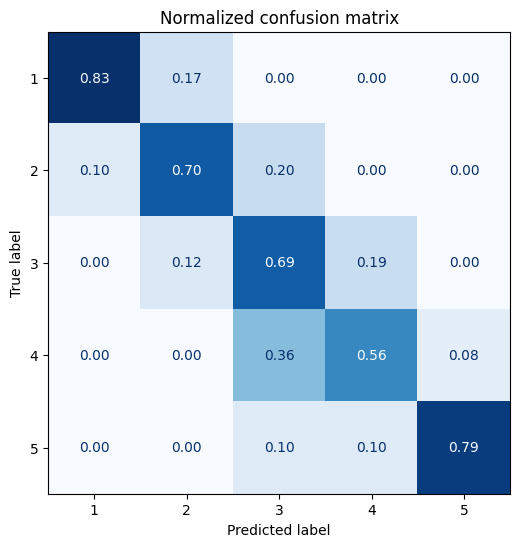

In [ ]:
labels = ['1','2','3','4', '5']
plot_confusion_matrix(y_preds, y_test, labels)

Results are similar to the one we got before fine tuning.

### BERT

 The BERT model is a bidirectional transformer pretrained using a combination of masked language modeling objective and next sentence prediction on a large corpus comprising the Toronto Book Corpus and Wikipedia.

In [ ]:
model_ckpt = "bert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_labels = 5
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=5)
         .to(device))

In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [ ]:
batch_size = 8
logging_steps = len(ds_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-judgements"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=10,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False, #tqdm to see the progress bar
                                  logging_steps=logging_steps,
                                  push_to_hub=False,  # do not push on the hugging face hub
                                  log_level="error")

#### Fine Tuning

Again, we need to do the fine tuning in order to adapt the pre trained weights to our dataset.

In [ ]:
from transformers import Trainer

trainer_bert = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=ds_encoded["train"],
                  eval_dataset=ds_encoded["validation"],
                  tokenizer=tokenizer)
trainer_bert.train();

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.285200,0.950824,0.569892,0.516877
2,0.910300,0.757068,0.752688,0.729680
3,0.669800,0.743445,0.688172,0.661308
4,0.493300,0.576045,0.774194,0.753251
5,0.339900,0.557862,0.806452,0.807898
6,0.209900,0.560980,0.838710,0.839205
7,0.132000,0.760108,0.774194,0.778233
8,0.078700,0.738292,0.795699,0.795740
9,0.052800,0.690386,0.817204,0.816772
10,0.043200,0.721760,0.806452,0.806183


In [ ]:
preds_output = trainer_bert.predict(ds_encoded["test"])
preds_output.metrics

{'test_loss': 1.0966136455535889,
 'test_accuracy': 0.7110552763819096,
 'test_f1': 0.7106867421446403,
 'test_runtime': 1.3955,
 'test_samples_per_second': 285.2,
 'test_steps_per_second': 35.829}

In [ ]:
y_preds = np.argmax(preds_output.predictions, axis=1)
y_test = np.array(ds_hidden["test"]["label"])

In [ ]:
let_y_true, let_y_pred = from_encode_to_literal_labels(y_test, y_preds)
print('Test set')
print(metrics.classification_report(let_y_true, let_y_pred))

Test set
              precision    recall  f1-score   support

           1       0.69      0.83      0.75        42
           2       0.79      0.71      0.74       126
           3       0.67      0.72      0.69       129
           4       0.65      0.60      0.62        72
           5       0.79      0.79      0.79        29

    accuracy                           0.71       398
   macro avg       0.72      0.73      0.72       398
weighted avg       0.71      0.71      0.71       398



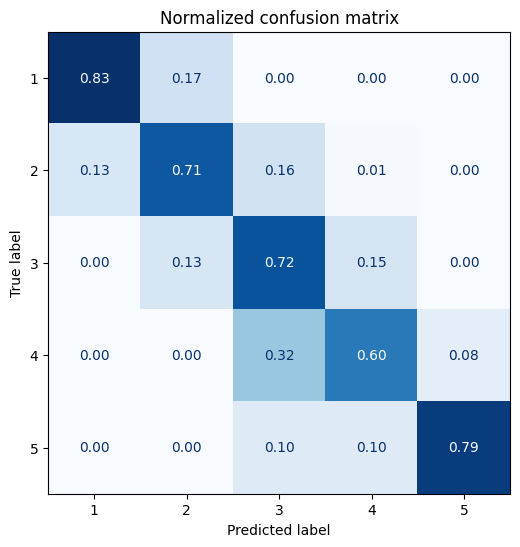

In [ ]:
labels = ['1','2','3','4', '5']
plot_confusion_matrix(y_preds, y_test, labels)

Results are really similar to the ones obtained with the DistilBERT model.

We see we have more power in classifying class 3.

### BERT with the initial dataset (without the duplication of minority classes)

Finally, we do again the BERT model, this time using the initial dataset with unbalanced classes.

We procede with the same steps we did before.

In [ ]:
df1 = mean_df.copy()
df1['SENTENCE'] = df1['SENTENCE'].apply(lambda x: x.lower())
df1['Complexity'] = df1['Complexity'].apply(lambda x: int(str(x))-1)

In [ ]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [ ]:
X1,Y1=df1['SENTENCE'], df1['Complexity']


In [ ]:
X1 = np.array(X1)
Y1 = np.array(Y1)

In [ ]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size = 0.30, random_state = 42)
X_train1, X_valid1, Y_train1, Y_valid1 = train_test_split(X_train1, Y_train1, test_size = 0.10, random_state = 42)

In [ ]:
train_ds_pandas1 = pd.concat([pd.Series(X_train1),pd.Series(Y_train1)],axis=1)
valid_ds_pandas1 = pd.concat([pd.Series(X_valid1),pd.Series(Y_valid1)],axis=1)
test_ds_pandas1 = pd.concat([pd.Series(X_test1),pd.Series(Y_test1)],axis=1)

In [ ]:
train_ds_pandas1.columns = ['text', 'label']
valid_ds_pandas1.columns = ['text', 'label']
test_ds_pandas1.columns = ['text', 'label']

In [ ]:
trainds1 = Dataset.from_pandas(train_ds_pandas1)
vds1 = Dataset.from_pandas(valid_ds_pandas1)
testds1 = Dataset.from_pandas(test_ds_pandas1)

In [ ]:
ds1 = DatasetDict()

ds1['train'] = trainds1
ds1['validation'] = vds1
ds1['test'] = testds1

print(ds1)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 747
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 83
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 356
    })
})


In [ ]:
print(tokenize(ds1["train"][:2]))

{'input_ids': [[101, 20230, 5211, 3694, 4546, 3404, 1010, 3731, 1010, 2001, 3205, 2007, 1996, 6454, 18720, 2213, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 21962, 14083, 3919, 13058, 1012, 2056, 2009, 3488, 2000, 16360, 3126, 26300, 3156, 1010, 2199, 6661, 1010, 2030, 2055, 1021, 1003, 1997, 2049, 6661, 5151, 1010, 1999, 2330, 3006, 11817, 1012, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [ ]:
ds1_encoded = ds1.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/747 [00:00<?, ? examples/s]

Map:   0%|          | 0/83 [00:00<?, ? examples/s]

Map:   0%|          | 0/356 [00:00<?, ? examples/s]

In [ ]:
print(ds1_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [ ]:
model_ckpt = "bert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_labels = 5
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=5)
         .to(device))

In [ ]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k: v.to(device) for k, v in batch.items()
              if k in tokenizer.model_input_names}

    # Extract logits
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    # Return logits for further analysis
    return {"hidden_state": logits.cpu().numpy()}


In [ ]:
ds1_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [ ]:
ds1_hidden = ds1_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/747 [00:00<?, ? examples/s]

Map:   0%|          | 0/83 [00:00<?, ? examples/s]

Map:   0%|          | 0/356 [00:00<?, ? examples/s]

In [ ]:
ds1_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [ ]:
X_train = np.array(ds1_hidden["train"]["hidden_state"])
X_valid = np.array(ds1_hidden["validation"]["hidden_state"])
y_train = np.array(ds1_hidden["train"]["label"])
y_valid = np.array(ds1_hidden["validation"]["label"])
X_test = np.array(ds1_hidden["test"]["hidden_state"])
y_test = np.array(ds1_hidden["test"]["label"])

X_train.shape, X_valid.shape, X_test.shape

((747, 5), (83, 5), (356, 5))

In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [ ]:
batch_size = 8
logging_steps = len(ds1_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-judgements"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=10,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False, #tqdm to see the progress bar
                                  logging_steps=logging_steps,
                                  push_to_hub=False,  # do not push on the hugging face hub
                                  log_level="error")

In [ ]:
from transformers import Trainer

trainer_bert = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=ds1_encoded["train"],
                  eval_dataset=ds1_encoded["validation"],
                  tokenizer=tokenizer)
trainer_bert.train();

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.211000,1.078446,0.457831,0.351973
2,0.861500,0.994990,0.506024,0.418027
3,0.610300,1.069381,0.626506,0.601385
4,0.462400,1.114081,0.602410,0.587669
5,0.336400,1.264796,0.614458,0.598173
6,0.225200,1.213324,0.638554,0.632482
7,0.150800,1.372479,0.626506,0.622051
8,0.129900,1.532167,0.614458,0.603112
9,0.084300,1.512192,0.626506,0.624682
10,0.081700,1.560772,0.626506,0.624682


In [ ]:
preds_output1 = trainer_bert.predict(ds1_encoded["test"])
preds_output1.metrics

{'test_loss': 1.231735110282898,
 'test_accuracy': 0.6713483146067416,
 'test_f1': 0.6556868867112579,
 'test_runtime': 1.2691,
 'test_samples_per_second': 280.524,
 'test_steps_per_second': 35.459}

In [ ]:
y_preds1 = np.argmax(preds_output1.predictions, axis=1)
y_test1 = np.array(ds1_hidden["test"]["label"])

In [ ]:
let_y_true1, let_y_pred1 = from_encode_to_literal_labels(y_test1, y_preds1)
print('Test set')
print(metrics.classification_report(let_y_true1, let_y_pred1))

Test set
              precision    recall  f1-score   support

           1       0.46      0.69      0.55        16
           2       0.75      0.77      0.76       117
           3       0.64      0.77      0.70       139
           4       0.69      0.42      0.52        74
           5       0.00      0.00      0.00        10

    accuracy                           0.67       356
   macro avg       0.51      0.53      0.51       356
weighted avg       0.66      0.67      0.66       356



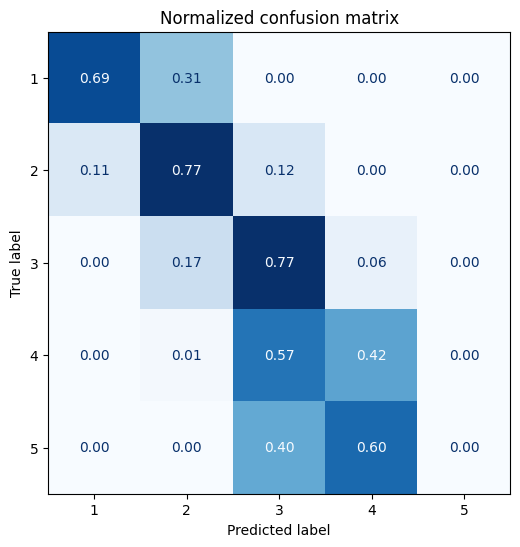

In [ ]:
labels = ['1','2','3','4', '5']
plot_confusion_matrix(y_preds1, y_test1, labels)

Clearly, the BERT model implemented using the original dataset is not able at all to predict the most complex sentences, while being quite efficient in all the other classes. This is obviously caused by the fact that in class 5 there are only 28 sentences and the model do not have enough information to train the recurrent neural network in an efficient way. Then, we can confirm that having duplicated some sentences in the minority classes really improved the situation.

# CONCLUSIONS

In summary, the fine-tuned BERT model stands out as the more effective predictor for complexity classes. However, it's worth noting that the RNN also exhibits an ability to distinguish between the various complexity classes.

Considering both the datasets, the issues of misclassification in both datasets can be attributed to the subjectivity nature of judgements. This subjectivity introduces complexity, making it more challenging for the model to accurately classify sentences.

Upon a closer comparison of the English and Italian datasets, it becomes evident that models applied to the English dataset exhibit significantly better performance. Conversely, the model applied to the Italian dataset demonstrates signs of considerable overfitting, leading to inaccurate class predictions.

Furthermore, the Italian dataset, with its six classes, results in a lower number of sentences for each class. This imbalance likely contributes to misclassifications, adding another layer of complexity to the task.





